In [5]:
import pandas as pd

# Load datasets
customers = pd.read_csv("/Customers (1).csv")
transactions = pd.read_csv("/Transactions (1).csv")
products = pd.read_csv("/Products (1).csv")

# Preview datasets
print(customers.head())
print(transactions.head())
print(products.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
  ProductID              ProductName     Category   Price
0      P001

In [6]:
# Aggregate transactional data to create customer profiles
customer_transactions = transactions.groupby("CustomerID").agg({
    "TotalValue": "sum",
    "Quantity": "sum",
    "TransactionID": "count"  # Transaction frequency
}).rename(columns={"TransactionID": "TransactionCount"}).reset_index()

# Optionally, calculate product preferences
transactions_products = transactions.merge(products, on="ProductID")
category_preferences = transactions_products.groupby(["CustomerID", "Category"]).size().unstack(fill_value=0)
category_preferences = category_preferences.div(category_preferences.sum(axis=1), axis=0)  # Normalize

# Combine all features into one dataset
customer_profiles = customers.merge(customer_transactions, on="CustomerID", how="left")
customer_profiles = customer_profiles.join(category_preferences, on="CustomerID")
print(customer_profiles.head())


  CustomerID        CustomerName         Region  SignupDate  TotalValue  \
0      C0001    Lawrence Carroll  South America  2022-07-10     3354.52   
1      C0002      Elizabeth Lutz           Asia  2022-02-13     1862.74   
2      C0003      Michael Rivera  South America  2024-03-07     2725.38   
3      C0004  Kathleen Rodriguez  South America  2022-10-09     5354.88   
4      C0005         Laura Weber           Asia  2022-08-15     2034.24   

   Quantity  TransactionCount  Books  Clothing  Electronics  Home Decor  
0      12.0               5.0  0.200      0.00     0.600000    0.200000  
1      10.0               4.0  0.000      0.50     0.000000    0.500000  
2      14.0               4.0  0.000      0.25     0.250000    0.500000  
3      23.0               8.0  0.375      0.00     0.250000    0.375000  
4       7.0               3.0  0.000      0.00     0.666667    0.333333  


In [7]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for clustering
features = customer_profiles.drop(columns=["CustomerID", "CustomerName", "Region", "SignupDate"])

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.impute import SimpleImputer # Import SimpleImputer for handling NaNs

# ... (your previous code to load and process data) ...

# Select numerical features for clustering
features = customer_profiles.drop(columns=["CustomerID", "CustomerName", "Region", "SignupDate"])

# Impute missing values using the mean (you can choose other strategies)
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
features_imputed = imputer.fit_transform(features) # Impute missing values

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_imputed) # Scale the imputed features

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Choose the number of clusters (e.g., 4)
customer_profiles['Cluster'] = kmeans.fit_predict(scaled_features)



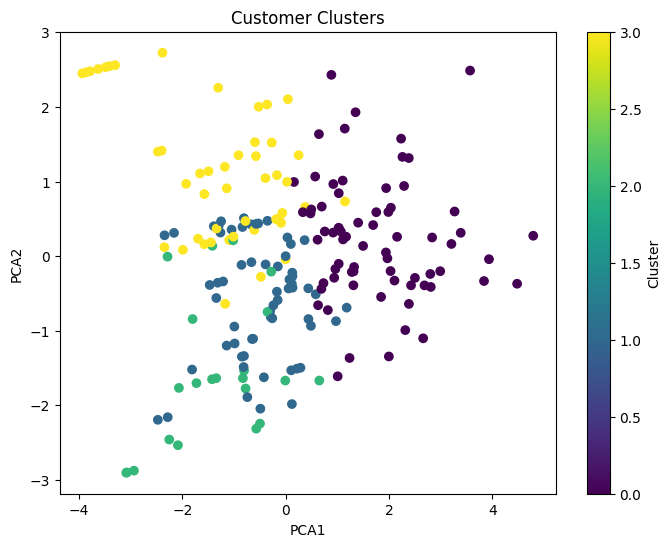

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
customer_profiles['PCA1'], customer_profiles['PCA2'] = pca_features[:, 0], pca_features[:, 1]

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(customer_profiles['PCA1'], customer_profiles['PCA2'], c=customer_profiles['Cluster'], cmap='viridis')
plt.title("Customer Clusters")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label="Cluster")
plt.show()


In [12]:
customer_profiles.to_csv("Clustering_Results.csv", index=False)


In [13]:
from google.colab import files
files.download("Clustering_Results.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>